In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\User\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df=df[df['job_title_short']=="Data Analyst"]

In [30]:
df_exploded=df.explode('job_skills')

skills_stats= df_exploded.groupby('job_skills').agg(
    skills_count=('job_skills',"count"),
    median_salary=('salary_year_avg','median')
)

skills_stats=skills_stats.sort_values(by='skills_count',ascending=False).head(10)

<function matplotlib.pyplot.show(close=None, block=None)>

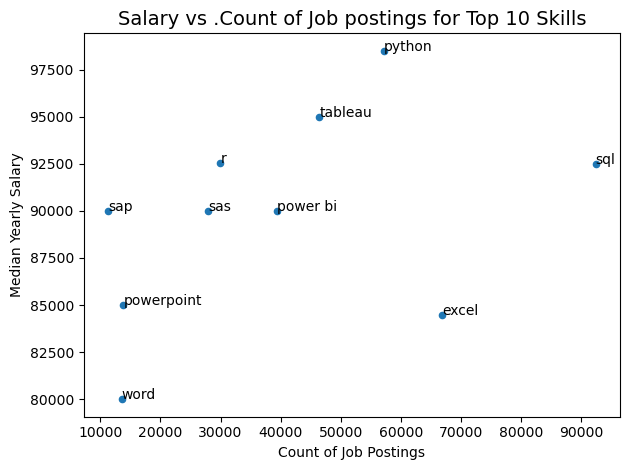

In [34]:
skills_stats.plot(kind='scatter', x='skills_count',y='median_salary')
for i, txt in enumerate(skills_stats.index):
    plt.text(skills_stats['skills_count'].iloc[i], skills_stats['median_salary'].iloc[i], txt)

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs .Count of Job postings for Top 10 Skills',fontsize=14,)
plt.tight_layout()
plt.show